In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
titanic_data = pd.read_csv('/content/tested.csv')


In [ ]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

data preprocessing


In [ ]:
# Handle missing values (e.g., fill missing ages with the mean age)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Encode categorical variables (e.g., convert 'Sex' to numerical)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Select relevant features and the target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']
print(X)
print(y)


     Pclass  Sex       Age  SibSp  Parch      Fare
0         3  NaN  34.50000      0      0    7.8292
1         3  NaN  47.00000      1      0    7.0000
2         2  NaN  62.00000      0      0    9.6875
3         3  NaN  27.00000      0      0    8.6625
4         3  NaN  22.00000      1      1   12.2875
..      ...  ...       ...    ...    ...       ...
413       3  NaN  30.27259      0      0    8.0500
414       1  NaN  39.00000      0      0  108.9000
415       3  NaN  38.50000      0      0    7.2500
416       3  NaN  30.27259      0      0    8.0500
417       3  NaN  30.27259      1      1   22.3583

[418 rows x 6 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
# Select features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_data['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import classification_report



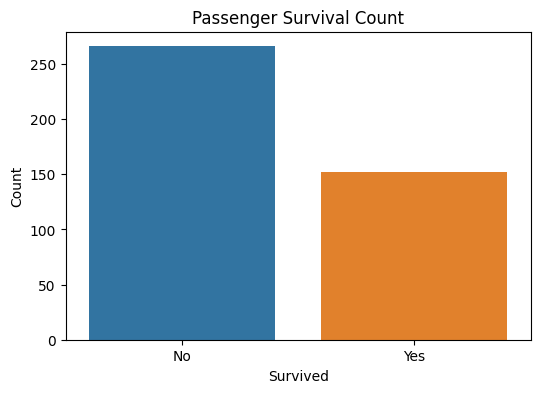

In [ ]:
# Count the number of passengers in each survival category
survival_counts = titanic_data['Survived'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Passenger Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes' for better labeling
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]


In [ ]:
from sklearn.metrics import confusion_matrix
